In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdrive


<h3><b>Main task of this Analysis is to find that:</b></h3>
<h4>Is there any relationship between the spread of the corona virus in a country and how happy people living in that country?</h4>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

<h1>About the datasets:</h1>



In this, we are going to use two datasets: Covid-19 dataset and World Happiness Dataset.


the first dataset which we are going to use is Covid-19 dataset is created by Johns Hopkins University. It consists of two datasets:

1.   covid19_Confirmed_dataset.csv 
2.   covid19_deaths_dataset.csv


second dataset is World happiness dataset is annual poplulation of United Nations having one dataset. 

1.   worldwide_happiness_report.csv


This dataset consists of scores given by people on various life factors like their lifestyle, social support,etc.



In [9]:
# Import Covid-19 Dataset

covid_confirm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid-19 Data Analysis/Covid-19 Dataset/covid19_Confirmed_dataset.csv')
covid_confirm.head(30)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,104,104,104,105,106,106,106,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2969,2971,2976,2982,2994,3002,3004,3016,3016,3025


In [10]:
# shape of the dataframe

covid_confirm.shape

(266, 104)

In [14]:
# drop usless columns->Lat, Long

covid_confirm.drop(['Lat','Long'], axis=1, inplace=True)

KeyError: ignored

In [15]:
covid_confirm.head() #inplace=True deletes given column in this dataset also

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [16]:
# aggregating the rows by the country

covid_aggregated_dataset = covid_confirm.groupby('Country/Region').sum() 
covid_aggregated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [17]:
# shape of covid_aggregated_dataset

covid_aggregated_dataset.shape

(187, 100)

Let's visualize the data related to a country for better understanding.

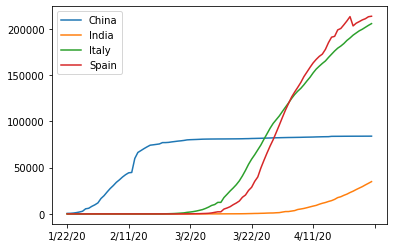

In [18]:
# China
covid_aggregated_dataset.loc['China'].plot()

# India
covid_aggregated_dataset.loc['India'].plot()

# Italy
covid_aggregated_dataset.loc['Italy'].plot()

# Spain
covid_aggregated_dataset.loc['Spain'].plot()

plt.legend()
plt.show()

<h4>Let's calculate the good measure of the country.</h4>

Good measure represents a number describing the spread of the virus in a country




This covid-19 dataset consists of no. of cases from 22/01/2020 to 30/04/2020.

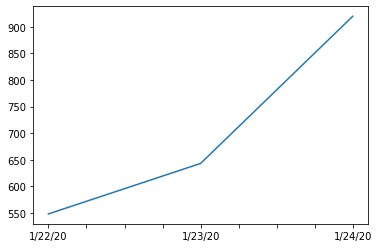

In [19]:
# So let's find the good measure of China of first three days

covid_aggregated_dataset.loc['China'][:3].plot()



*  According to this plot, in 22/01/2020, 550 cases were recorded and in 23/01/2020, around 650 cases were recorded that means in 24 hours, 100 new infected cases were recorded and after 24 hours, i.e. in 24th Jan.,2020, around 900 cases were recorded..that means virus was spreading very fast.




Spread of the virus is the average number of new confirmed cases or we can say it's a maximum number of new cases.

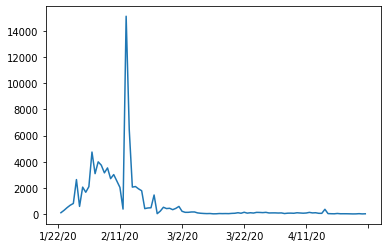

In [20]:
# calculate maximum number of new cases in a period i.e. first derivative

covid_aggregated_dataset.loc['China'].diff().plot()



*   This plot shows the change in infection rate day by day in a period. And the maximum number of cases is above 14000 till 30/04/2020.




In [21]:
# maximum infection rate for China
covid_aggregated_dataset.loc['China'].diff().max()

15136.0

*   In one day, 15136 new cases has been recorded which is the highest number of infected cases recorded in China in only 24 hours.

In [22]:
# maximum infection rate for India
covid_aggregated_dataset.loc['India'].diff().max()

1893.0

*   In one day, 1893 new cases has been recorded which is the highest number of infected cases recorded in India in only 24 hours.

In [23]:
# maximum infection rate for Italy
covid_aggregated_dataset.loc['Italy'].diff().max()

6557.0

*   In one day, 6557 new cases has been recorded which is the highest number of infected cases recorded in India in only 24 hours.

In [24]:
# maximum infection rate for Spain
covid_aggregated_dataset.loc['Spain'].diff().max()

9630.0

*   In one day, 9630 new cases has been recorded which is the highest number of infected cases recorded in India in only 24 hours.

In [25]:
# maximum infection rate for all the countries
countries = list(covid_aggregated_dataset.index)

max_infection_rate = []

for c in countries:
  max_infection_rate.append(covid_aggregated_dataset.loc[c].diff().max())

In [26]:
max_infection_rate

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [27]:
# add max_infection_rate to covid_aggregated_dataset
covid_aggregated_dataset['max_infection_rate'] = max_infection_rate

In [28]:
covid_aggregated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [29]:
# create a new dataframe with only needed column
covid_data = pd.DataFrame(covid_aggregated_dataset["max_infection_rate"])

In [30]:
covid_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [31]:
# Import World Happiness report dataset

world_happiness = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Covid-19 Data Analysis/Worldwide Happiness Report/worldwide_happiness_report.csv')
world_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [32]:
# drop useless columns

world_happiness.drop(['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption'], axis=1, inplace=True)
world_happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [33]:
# change the indices of the dataframe to Country or region
world_happiness.set_index("Country or region", inplace=True)

In [34]:
world_happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Let's join two datasets we've prepared

In [35]:
''' shape of covid_aggregated_dataset: (187,2)
    shape of world_happiness: (156,4)
    shape of covid_aggregated_dataset is much higher than the shape of world happiness
    so, that's why we use inner join'''
dataframe = covid_data.join(world_happiness,how='inner')

In [36]:
dataframe.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [37]:
# to find is there any correlation between different life factors and column represent the spread of the virus in each of the country
# correlation matrix: having correlation coefficients of every two column in a dataset

dataframe.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<h2>Visualize the result</h2>


In [38]:
dataframe.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

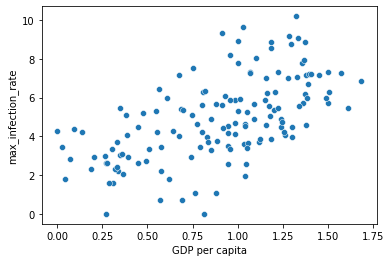

In [39]:
# plotting GDP vs max_infection_rate
x = dataframe['GDP per capita']
y = dataframe['max_infection_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

due to different scaling, it's very difficult to visualize the plot so we use log in y axis, i.e. in GDP per capita.



*   As GDP per captia grows, max_infection_rate also growing.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


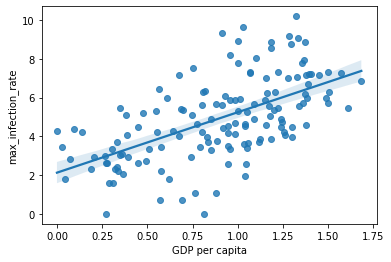

In [40]:
sb.regplot(x,np.log(y)) # for better visualization



*   There's a positive slope between GDP per capita and max_infection_rate



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

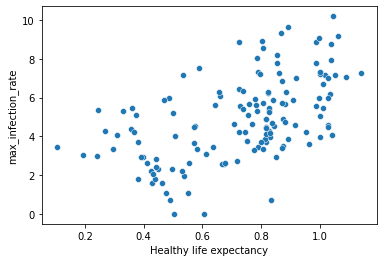

In [41]:
# plotting Healthy life expectancy vs max_infection_rate
x = dataframe['Healthy life expectancy']
y = dataframe['max_infection_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


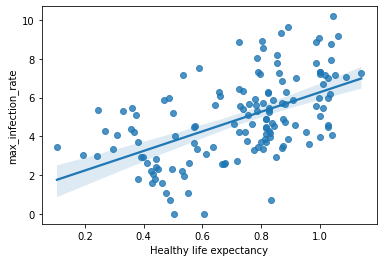

In [42]:
sb.regplot(x,np.log(y)) # for better visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

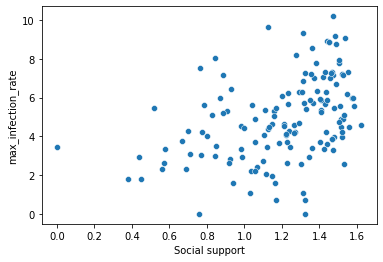

In [43]:
# plotting Social support vs max_infection_rate
x = dataframe['Social support']
y = dataframe['max_infection_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


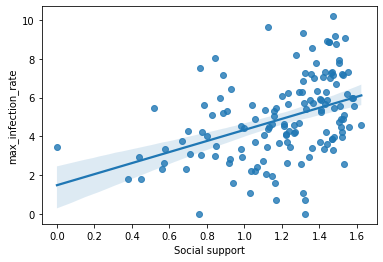

In [44]:
sb.regplot(x,np.log(y)) # for better visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

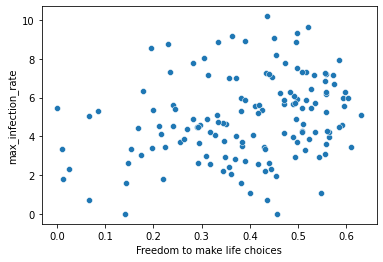

In [45]:
# plotting Freedom to make life choices vs max_infection_rate
x = dataframe['Freedom to make life choices']
y = dataframe['max_infection_rate']
sb.scatterplot(x,np.log(y))
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


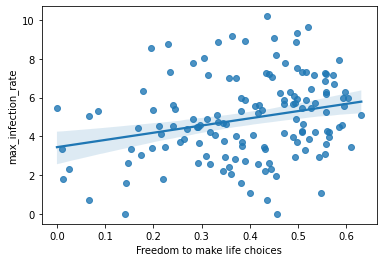

In [46]:
sb.regplot(x,np.log(y)) # for better visualization



*   If we visualize all the plots, then we see that all the plot have positive correlation.




## Conclusion

*   People living in developed countries are more prone to get infection of corona virus as compared to less-developed countries.
*   Maybe because of lack of corona test kits in less-developed countries.


